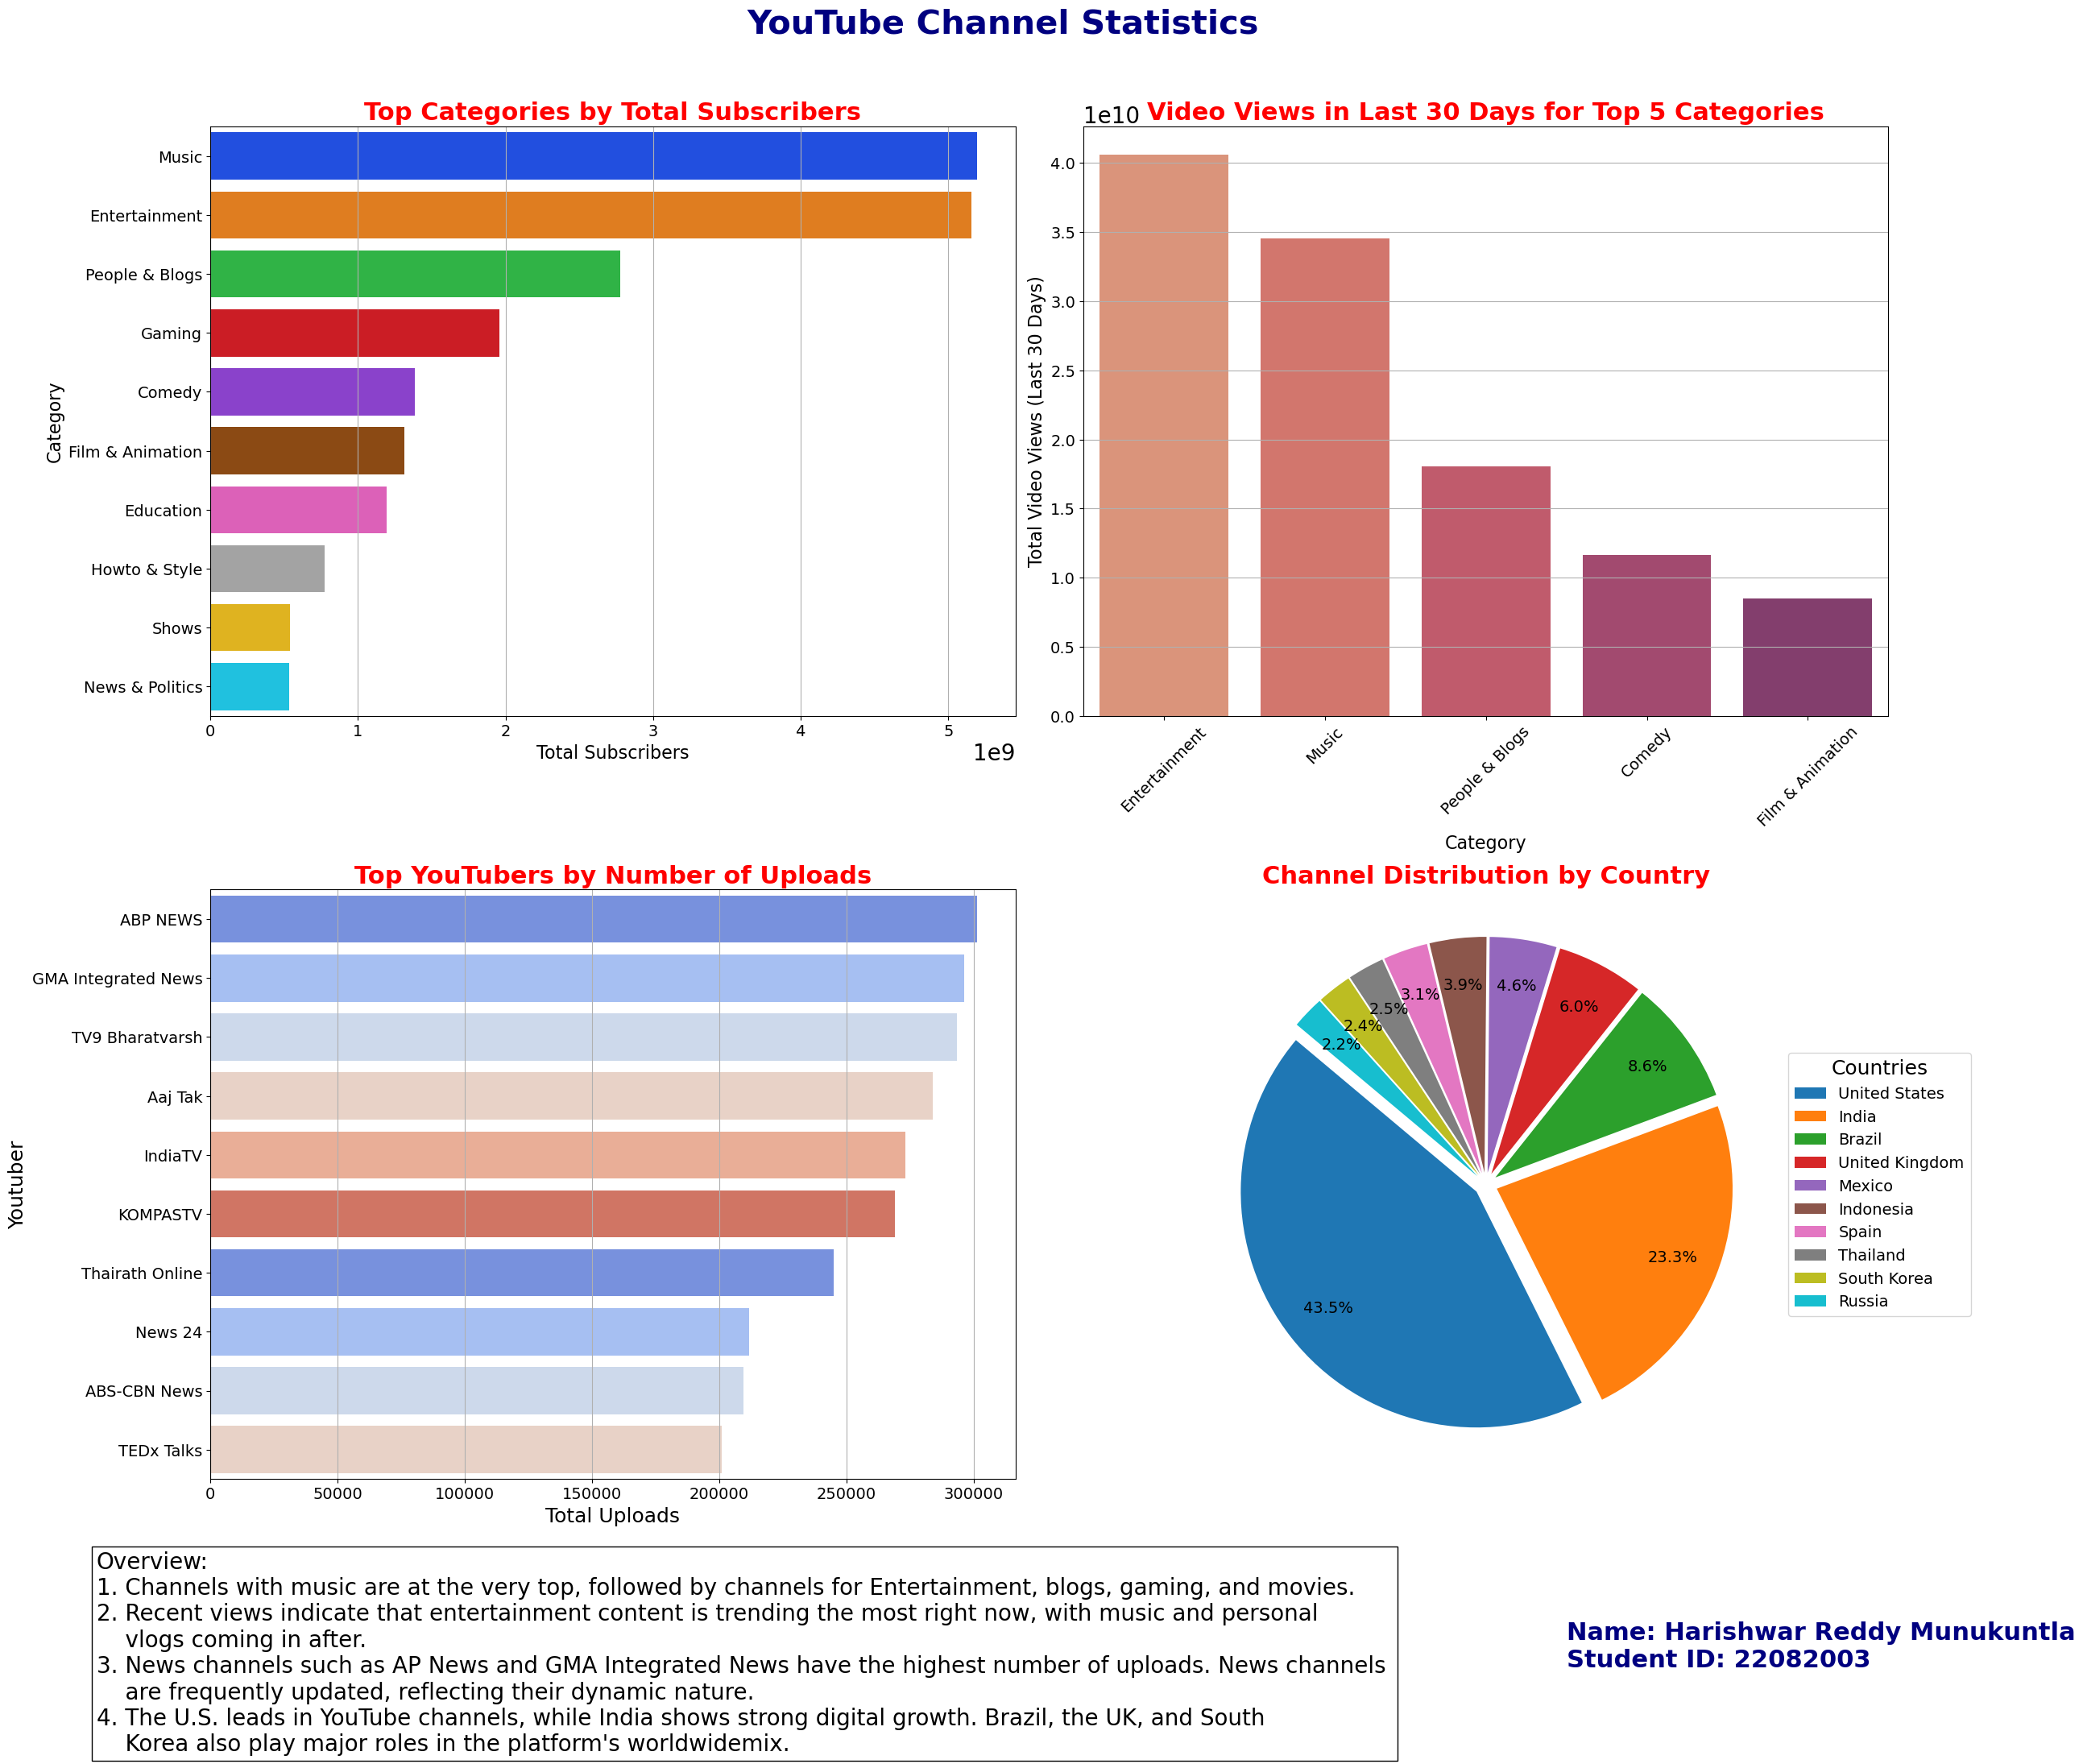

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


def top_categories(data, ax):
    """
    Draws a bar chart showing the most popular YouTube categories by 
    subscriber count.

    data: DataFrame containing YouTube channel data.
    ax: Matplotlib axes object where the chart will be drawn.

    The function calculates the total subscribers for each category and shows 
    the top 10.
    """
    # Calculate total subscribers for each category and get the top 10
    top_categories = data.groupby('category')['subscribers'].sum(
    ).sort_values(ascending=False).head(10)

    # Draw a bar chart with the calculated data
    sns.barplot(x=top_categories.values, y=top_categories.index,
                palette=sns.color_palette("bright"), ax=ax)

    # Set title and labels with bigger fonts
    ax.set_title("Top Categories by Total Subscribers",
                 fontsize=22, fontweight='bold', color='red')
    ax.set_xlabel("Total Subscribers", fontsize=16)
    ax.set_ylabel("Category", fontsize=16)

    # Make the numbers on axes bigger
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)

    # Make the scientific notation (like 1e10) bigger
    ax.xaxis.get_offset_text().set_fontsize(20)
    ax.grid(axis='x')


def video_views(data, ax):
    """
    Draws a bar chart showing which YouTube categories got the most views in 
    the last 30 days.

    data: DataFrame containing YouTube channel data.
    ax: Matplotlib axes object where the chart will be drawn.

    The function sums up the views for each category and shows the top 5.
    """
    # Calculate total views for each category and get the top 5
    top_categories_recent_views = data.groupby('category')[
        'video_views_for_the_last_30_days'].sum().sort_values(
            ascending=False).head(5)

    # Draw a bar chart with the calculated data
    sns.barplot(x=top_categories_recent_views.index,
                y=top_categories_recent_views.values, 
                palette=sns.color_palette("flare"), ax=ax)

    # Set title and labels with bigger fonts
    ax.set_title("Video Views in Last 30 Days for Top 5 Categories",
                 fontsize=22, fontweight='bold', color='red')
    ax.set_xlabel("Category", fontsize=16)
    ax.set_ylabel("Total Video Views (Last 30 Days)", fontsize=16)

    # Make the numbers on axes bigger and rotate the x-axis labels for clarity
    ax.tick_params(axis='x', labelsize=14, rotation=45)
    ax.tick_params(axis='y', labelsize=14)

    # Make the scientific notation (like 1e10) on y-axis bigger
    ax.yaxis.get_offset_text().set_fontsize(20)
    ax.grid(axis='y')


def top_youtubers_by_uploads(data, ax):
    """
    Draws a bar chart showing the YouTubers with the most uploads.

    data: DataFrame containing YouTube channel data.
    ax: Matplotlib axes object where the chart will be drawn.

    The function calculates the total uploads for each YouTuber and shows the 
    top 10.
    """
    # Calculate total uploads for each YouTuber and get the top 10
    top_youtubers = data.groupby('Youtuber')['uploads'].sum(
    ).sort_values(ascending=False).head(10)

    # Draw a bar chart with the calculated data
    sns.barplot(x=top_youtubers.values, y=top_youtubers.index,
                palette=sns.color_palette("coolwarm"), ax=ax)

    # Set title and labels with bigger fonts
    ax.set_title("Top YouTubers by Number of Uploads",
                 fontsize=22, fontweight='bold', color='red')
    ax.set_xlabel("Total Uploads", fontsize=18)
    ax.set_ylabel("Youtuber", fontsize=18)

    # Make the numbers on axes bigger
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.grid(axis='x')


def autopct_function(pct, allvals):
    """
    Formats the percentage labels on pie charts.

    pct: The percentage value.
    allvals: All values in the pie chart.

    Returns a string showing both the percentage and the absolute number.
    """
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)


def channels_by_country(data, ax):
    """
    Draws a pie chart showing which countries have the most YouTube channels.

    data: DataFrame containing YouTube channel data.
    ax: Matplotlib axes object where the chart will be drawn.

    The function counts the number of channels from each country and shows 
    top 10.
    """
    # Count the number of channels from each country and get the top 10
    country_distribution = data['Country'].value_counts().head(10)

    # Slightly separate the slices of the pie chart
    explode = [0.05] * len(country_distribution)

    # Draw the pie chart
    wedges, texts, autotexts = ax.pie(country_distribution, autopct="%1.1f%%", 
                                      startangle=140, 
                                      colors=sns.color_palette("tab10"), 
                                      explode=explode, pctdistance=0.80)

    # Make the percentage texts bigger
    for autotext in autotexts:
        autotext.set_fontsize(14)

    # Set title with bigger font
    ax.set_title("Channel Distribution by Country",
                 fontsize=22, fontweight='bold', color='red')

    # Customize the legend
    ax.legend(wedges, country_distribution.index, title="Countries", 
              loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=14,
              title_fontsize=18)


def infographic_plots(data, name, student_id):
    """
    Creates a full-page infographic with four different YouTube data charts.

    data: DataFrame containing YouTube channel data.
    name: The name of the student.
    student_id: The student's ID.

    The function creates a 2x2 grid of plots and includes an overview text and
    student info.
    """
    plt.figure(figsize=(25, 20))

    # Create each subplot
    ax1 = plt.subplot(2, 2, 1)
    top_categories(data, ax1)

    ax2 = plt.subplot(2, 2, 2)
    video_views(data, ax2)

    ax3 = plt.subplot(2, 2, 3)
    top_youtubers_by_uploads(data, ax3)

    ax4 = plt.subplot(2, 2, 4)
    channels_by_country(data, ax4)

    # Add an overview text explaining the plots
    # Overview
    overview = ("Overview:\n"
                "1. Channels with music are at the very top, followed by "
                "channels for Entertainment, blogs, gaming, and movies.\n"
                "2. Recent views indicate that entertainment content is "
                "trending the most right now, with music and personal \n"
                "    vlogs coming in after.\n"
                "3. News channels such as AP News and GMA Integrated News have"
                " the highest number of uploads. News channels \n"
                "    are frequently updated, reflecting their dynamic "
                "nature.\n"
                "4. The U.S. leads in YouTube channels, while India shows "
                "strong digital growth. Brazil, the UK, and South \n"
                "    Korea also play major roles in the platform's worldwide"
                "mix.")

    # Position and format the overview text
    plt.figtext(0.05, -0.10, overview, ha='left', fontsize=20,
                wrap=True, bbox=dict(facecolor='white'))

    # Add main title and student info
    plt.suptitle("YouTube Channel Statistics", fontsize=30,
                 fontweight='bold', color='navy')
    plt.figtext(0.78, -0.05, f"Name: {name}\nStudent ID: {student_id}",
                ha='left', fontsize=22, fontweight='bold', color='navy')

    # Adjust layout to fit everything
    plt.subplots_adjust(hspace=0.4, wspace=0.3)
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    #plt.savefig(f"{student_id}.png", dpi=300, bbox_inches='tight')
    plt.show()


# Load data and create infographic
file_path = 'Global YouTube Statistics.csv'
data = pd.read_csv(file_path, encoding='latin1')
name = "Harishwar Reddy Munukuntla"
student_id = "22082003"
infographic_plots(data, name, student_id)
